<a href="https://colab.research.google.com/github/pk18singh/Flat_Prediction_Model/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('properties_cleaned_v1.csv')

In [ ]:
df.duplicated().sum()

122

In [ ]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 81,0.89,8127.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1,1,0,not available,1.0,NaN,undefined,"['Orris Community Center', 'Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Vijay Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol pump Maitri motors', 'Indian Oil', ""McDonald's"", 'Rao Dhaba', 'KFC', 'Pizza Hut', ""McDonald's""]","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN


**1. areaWithType**

In [ ]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
597,5.00,4300.0,Carpet area: 4300 (399.48 sq.m.)
1118,1.15,1534.0,Super Built up area 1534(142.51 sq.m.)Carpet area: 1056 sq.ft. (98.11 sq.m.)
1091,1.20,1350.0,Super Built up area 1350(125.42 sq.m.)
366,2.30,2585.0,Super Built up area 2585(240.15 sq.m.)
138,1.49,1963.0,Super Built up area 1963(182.37 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.)


In [ ]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [ ]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [ ]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [ ]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [ ]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3643,1.95,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
3239,2.50,flat,1884.0,Carpet area: 1884 (175.03 sq.m.),NaN,NaN,1884.0
1589,2.35,flat,1650.0,Super Built up area 1650(153.29 sq.m.),1650.0,NaN,NaN
8,0.85,house,1743.0,Built Up area: 1743 (161.93 sq.m.),NaN,1743.0,NaN
38,1.01,flat,1750.0,Super Built up area 1750(162.58 sq.m.)Built Up area: 1475 sq.ft. (137.03 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),1750.0,1475.0,1350.0


In [ ]:
df.duplicated().sum()

122

In [ ]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [ ]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,2.00,house,1337.0,Plot area 1337.4(124.25 sq.m.),NaN,NaN,NaN
10,3.80,house,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 sq.yards (135.45 sq.m.)Carpet area: 160 sq.yards (133.78 sq.m.),NaN,162.0,160.0
11,0.70,house,864.0,Plot area 864(80.27 sq.m.),NaN,NaN,NaN
22,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
39,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN


In [ ]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [ ]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [ ]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,2.00,house,1337.0,Plot area 1337.4(124.25 sq.m.),NaN,NaN,NaN
11,0.70,house,864.0,Plot area 864(80.27 sq.m.),NaN,NaN,NaN
22,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
39,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
45,13.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN


In [ ]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [ ]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [ ]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [ ]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,2.00,house,1337.0,Plot area 1337.4(124.25 sq.m.),NaN,1337.40,NaN
11,0.70,house,864.0,Plot area 864(80.27 sq.m.),NaN,864.00,NaN
22,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
39,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
45,13.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
52,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,350.00,NaN
55,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
56,10.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
57,17.00,house,4500.0,Plot area 4500(418.06 sq.m.),NaN,4500.00,NaN
70,0.27,house,225.0,Plot area 225(20.9 sq.m.),NaN,225.00,NaN


In [ ]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [ ]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [ ]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,2.00,house,1337.0,Plot area 1337.4(124.25 sq.m.),NaN,1337.40,NaN
11,0.70,house,864.0,Plot area 864(80.27 sq.m.),NaN,864.00,NaN
22,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
39,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
45,13.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN
52,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,3150.00,NaN
55,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
56,10.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
57,17.00,house,4500.0,Plot area 4500(418.06 sq.m.),NaN,4500.00,NaN
70,0.27,house,225.0,Plot area 225(20.9 sq.m.),NaN,225.00,NaN


In [ ]:
# update the original dataframe
df.update(all_nan_df)

In [ ]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [ ]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 81,0.89,8127.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1,1,0,not available,1.0,NaN,undefined,"['Orris Community Center', 'Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Vijay Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol pump Maitri motors', 'Indian Oil', ""McDonald's"", 'Rao Dhaba', 'KFC', 'Pizza Hut', ""McDonald's""]","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1095.0,NaN


**2. additionalRoom**

In [ ]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [ ]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [ ]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1104,pooja room,0,0,0,1,0
840,study room,1,0,0,0,0
2620,servant room,0,1,0,0,0
1326,servant room,0,1,0,0,0
827,servant room,0,1,0,0,0


In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 81,0.89,8127.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1,1,0,not available,1.0,NaN,undefined,"['Orris Community Center', 'Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Vijay Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol pump Maitri motors', 'Indian Oil', ""McDonald's"", 'Rao Dhaba', 'KFC', 'Pizza Hut', ""McDonald's""]","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1095.0,NaN,0,0,0,0,0
1,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,not available,3.0,West,0 to 1 Year Old,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '5 Fan', '1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1300.0,0,0,0,0,0
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,1650.0,Super Built up area 1850(171.87 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),3,2,3,"pooja room,servant room",6.0,South,10+ Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'Anand Hospital Gurgaon', 'pracksht hospital', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'Kotak mahindra bank', 'State bank of india', 'Indusind bank', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', 'Hdfc bank', '222', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal']",1850.0,1750.0,1650.0,0,1,0,1,0
3,flat,emaar mgf emerald floors premier,sector 65,3.00,15189.0,1975.0,Super Built up area 1975(183.48 sq.m.),4,4,3+,servant room,2.0,South-East,1 to 5 Year Old,"['WorldMark Gurgaon', 'Sohna Road', 'Golf C

**3.agePossession**

In [ ]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  22
By 2023                 19
By 2024                 17
Dec-24                  16
Mar-24                  14
Jan-24                   8
Oct-24                   8
Aug-23                   7
Jun-24                   7
Dec-25                   7
Nov-23                   5
Sep-23                   4
Jul-24                   4
By 2025                  4
Oct-23                   4
Aug-24                   4
May-24                   3
Jan-25                   3
Feb-24                   3
Nov-24                   3
Jan-26                   2
Aug-25                   2
Mar-25                   2
Jun-27                   2
Jul-25                   2
Jul-27                   2
By 2027                  2
Dec-26                   2
Oct-25                   2
S

In [ ]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [ ]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [ ]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              484
Old Property           310
Under Construction     132
Name: agePossession, dtype: int64

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 81,0.89,8127.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1,1,0,not available,1.0,NaN,Undefined,"['Orris Community Center', 'Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Vijay Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol pump Maitri motors', 'Indian Oil', ""McDonald's"", 'Rao Dhaba', 'KFC', 'Pizza Hut', ""McDonald's""]","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1095.0,NaN,0,0,0,0,0
1,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,not available,3.0,West,New Property,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '5 Fan', '1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1300.0,0,0,0,0,0
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,1650.0,Super Built up area 1850(171.87 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),3,2,3,"pooja room,servant room",6.0,South,Old Property,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'Anand Hospital Gurgaon', 'pracksht hospital', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'Kotak mahindra bank', 'State bank of india', 'Indusind bank', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', 'Hdfc bank', '222', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal']",1850.0,1750.0,1650.0,0,1,0,1,0
3,flat,emaar mgf emerald floors premier,sector 65,3.00,15189.0,1975.0,Super Built up area 1975(183.48 sq.m.),4,4,3+,servant room,2.0,South-East,Relatively New,"['WorldMark Gurgaon', 'Sohna Road', 'Golf Cours

**4.furnishDetails**

In [ ]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3442,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
1414,"['7 Wardrobe', '17 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
1298,[],NaN
2696,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
1295,"['3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"


In [ ]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [ ]:
furnishings_df.shape

(3803, 19)

In [ ]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-56-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [ ]:
furnishings_df.sample(5)

,Geyser,Sofa,Microwave,Bed,Exhaust Fan,Fridge,Curtains,Water Purifier,Dining Table,TV,Chimney,AC,Light,Washing Machine,Wardrobe,Stove,Modular Kitchen,Fan
1732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
868,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

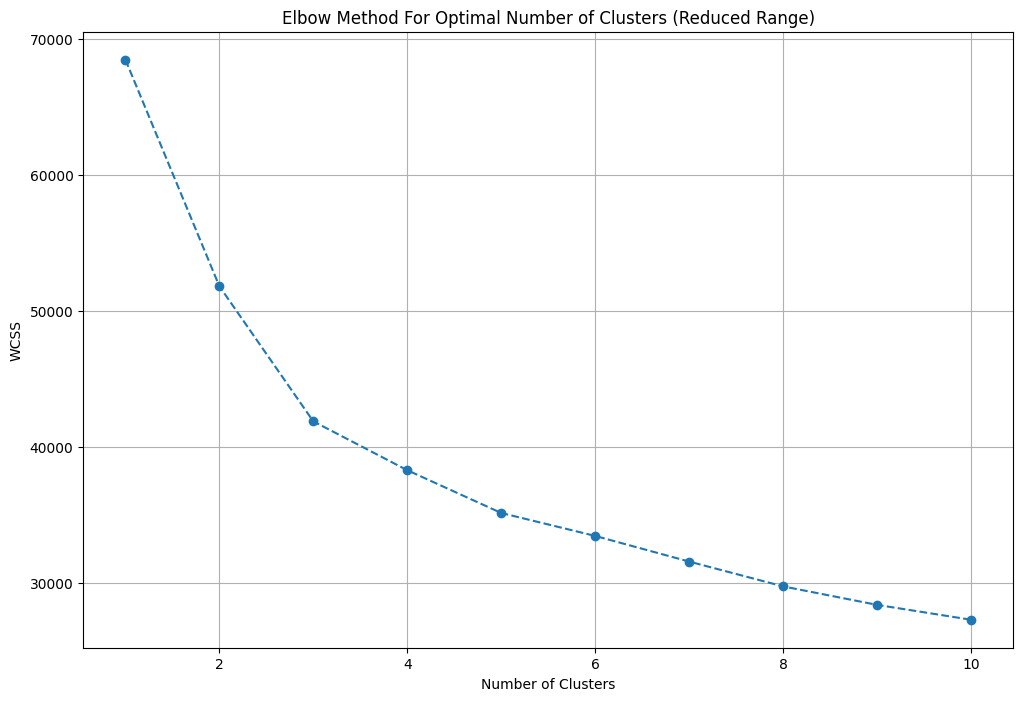

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df = df.iloc[:,:-18]

In [ ]:
df['furnishing_type'] = cluster_assignments

In [ ]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
639,"['4 Fan', '1 Exhaust Fan', '3 Geyser', '8 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', '6 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
2137,"['1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Curtains', '1 Modular Kitchen', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
2759,NaN,0
3065,NaN,0
2643,"['1 Wardrobe', '1 Stove', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


**5.features**

In [ ]:
df[['society','features']].sample(5)

,society,features
3265,indiabulls centrum park,"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
392,dlf the skycourt,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2819,"new colony, gurgaon","['Security / Fire Alarm', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Recently Renovated', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Waste Disposal']"
1860,ansal heights 86,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Visitor Parking']"
3241,pivotal devaan,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


In [ ]:
df['features'].isnull().sum()

635

In [ ]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [ ]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [ ]:
temp_df = df[df['features'].isnull()]

In [ ]:
temp_df.shape

(635, 26)

In [ ]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [ ]:
df.loc[temp_df.index,'features'] = x.values

In [ ]:
df['features'].isnull().sum()

481

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [ ]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [ ]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3498,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1283,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [ ]:
features_binary_df.shape

(3803, 130)

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

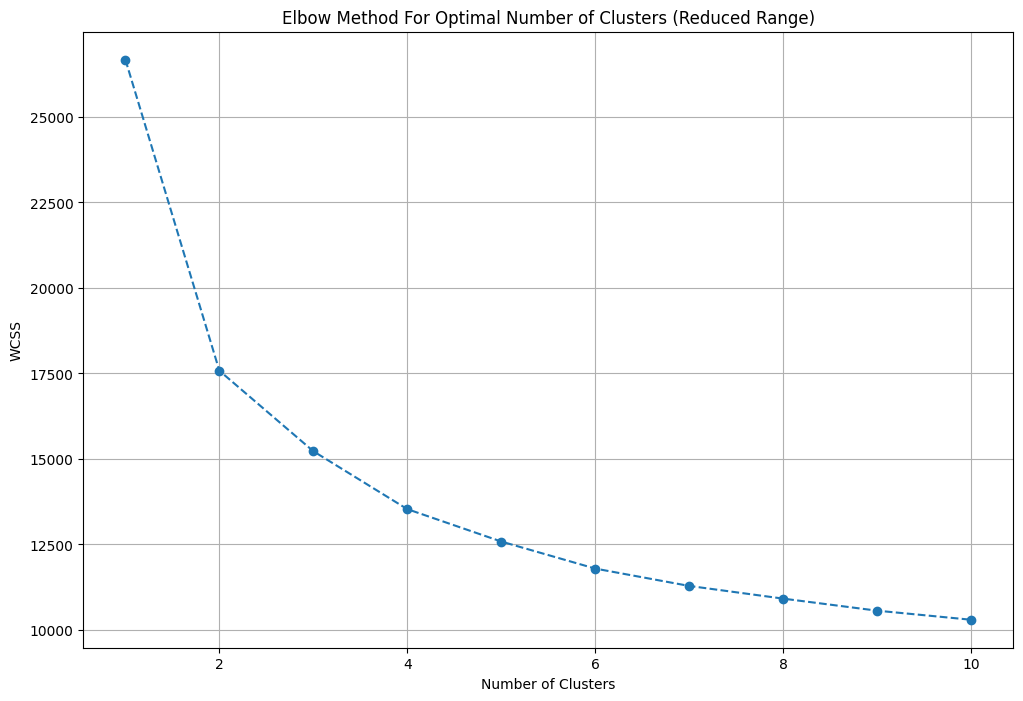

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [ ]:
df['luxury_score'] = luxury_score

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 81,0.89,8127.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1,1,0,not available,1.0,NaN,Undefined,"['Orris Community Center', 'Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Vijay Petrol Pump', 'Petrol Pump Indian Oil', 'Petrol pump Maitri motors', 'Indian Oil', ""McDonald's"", 'Rao Dhaba', 'KFC', 'Pizza Hut', ""McDonald's""]","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1095.0,NaN,0,0,0,0,0,0,[],0
1,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,not available,3.0,West,New Property,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '5 Fan', '1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1300.0,0,0,0,0,0,0,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, Bank Attached Property, Visitor Parking, Swimming Pool, Park, Internet/wi-fi connectivity, Low Density Society, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",87
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,1650.0,Super Built up area 1850(171.87 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),3,2,3,"pooja room,servant room",6.0,South,Old Property,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'Anand Hospital Gurgaon', 'pracksht hospital', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'Kotak mahindra bank', 'State bank of india', 'Indusind bank', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', 'Hdfc bank', '222', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Vi

In [ ]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [ ]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2618,flat,vatika the seven lamps,sector 82,0.89,8850.0,1006.0,Super Built up area 1428.08(132.67 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,2,14.0,East,Relatively New,1428.08,NaN,1000.00,1,0,0,0,0,2,129
1717,flat,birla navya,sector 63a,3.70,15416.0,2400.0,Carpet area: 2400 (222.97 sq.m.),3,3,3+,1.0,North,Under Construction,NaN,NaN,2400.00,0,0,0,0,0,0,72
199,flat,the close north,sector 50,2.75,12500.0,2200.0,Super Built up area 2605(242.01 sq.m.)Built Up area: 2400 sq.ft. (222.97 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),3,3,3,3.0,South-East,Moderately Old,2605.00,2400.0,2200.00,0,1,0,0,0,0,110
1987,flat,emaar mgf emerald floors premier,sector 65,2.24,13575.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,3,3,2.0,North-West,Relatively New,NaN,NaN,1650.00,1,1,0,0,0,0,46
3012,flat,ireo the corridors,sector 67a,1.80,14658.0,1228.0,Super Built up area 1921(178.47 sq.m.)Carpet area: 1227.96 sq.ft. (114.08 sq.m.),3,3,3,6.0,North,New Property,1921.00,NaN,1227.96,0,1,1,0,0,2,150


In [ ]:
df.shape

(3803, 23)

In [ ]:
df.to_csv('properties_cleaned_v2.csv',index=False)